In [22]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from collections import Counter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Loading dataset
data=pd.read_csv("Cellphone.csv")

In [4]:
# View dataset
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
data.isnull().sum() #checking for total null values

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [6]:
data.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [7]:
data.nunique()

Product_id       83
Price            81
Sale            125
weight           62
resoloution      24
ppi              45
cpu core          6
cpu freq         28
internal mem     10
ram              12
RearCam          18
Front_Cam        15
battery          55
thickness        49
dtype: int64

In [8]:
data.describe().T # statistical analysis

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [10]:
print(f'duplicated rows = {data.duplicated().sum()} ')

duplicated rows = 0 


Cleaning the noisy values in the features

In [12]:
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

Product_id : [ 203  880   40   99  947  774 1103  289  605  622 1058 1120  187  315
  860  990  104  776   10 1145 1020 1339  662  575  907  162  974  739
  738  804   43 1248   93  563  577  218   56  198   14  857  937   66
 1221 1011 1026 1216  237  763  131 1062  841 1143  183 1080  827  133
  832  637   64   30  409  143  798  460 1327 1198 1112  696 1089  497
  301  377  701 1161   32 1137  851  826  290 1131 1206 1296  856]
Price : [2357 1749 1916 1315 2137 1238 2580 2438 2006 2174 2744 1612 2258 2938
 2392 2977 1942 1390 1950 3316 2654 1421 2124 1777 2087 1843 2859 1989
 2685 1741 1347 3658 1984 2824 2746 2323 2044 1734 2276 3116 2571 1396
 2714 3005  791 3837 1646 1302 1831 1810 1511 2562 1522 2343  833 1676
 2858  754 2975 2880 3287 2054 2001  705 2491 2466 1357 2266 2445 2409
  628 2508 1921 3102 3055  614 4361 2536 3551 3211 3260]
Sale : [  10   11   12   13   14   15   16   17   19   20   21   22   23   24
   25   26   30   31   32   34   35   36   37   38   40   41   42  

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [14]:
data = data.drop(['Product_id'],axis=1)

<AxesSubplot:>

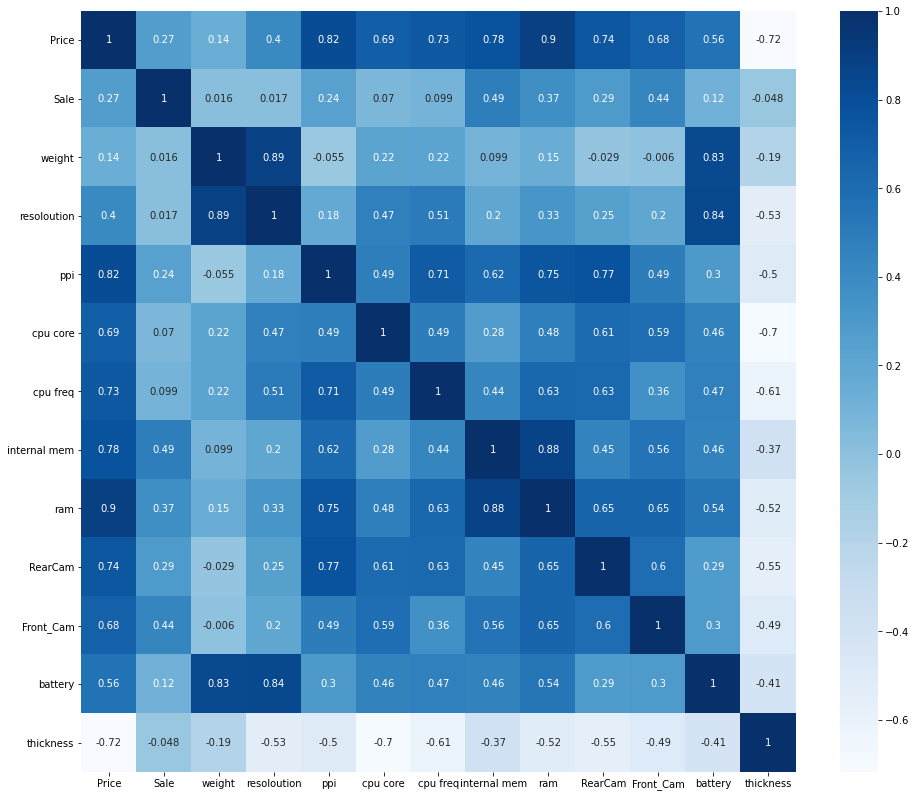

In [15]:
plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

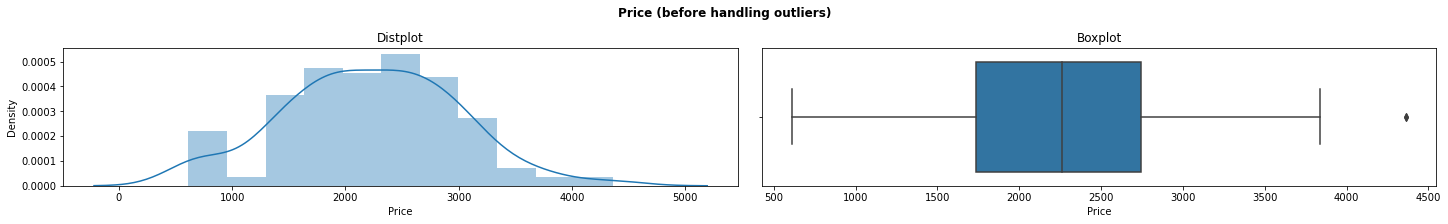

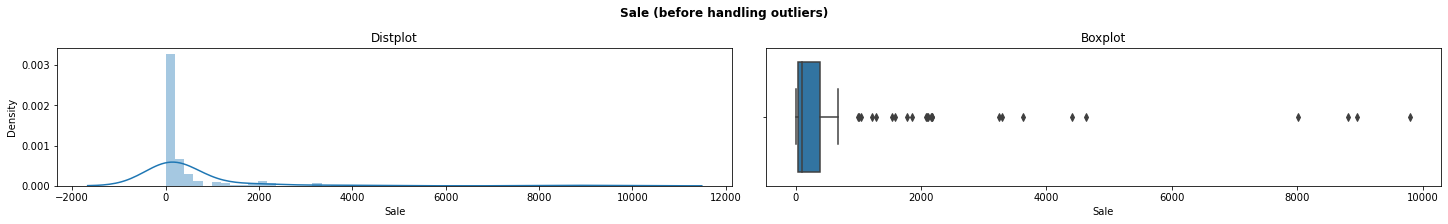

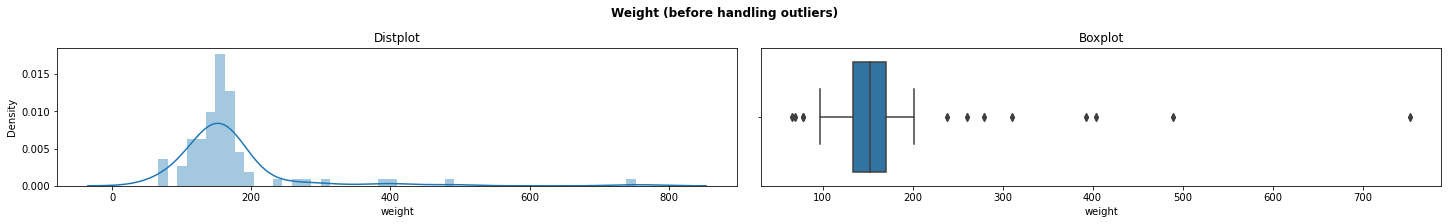

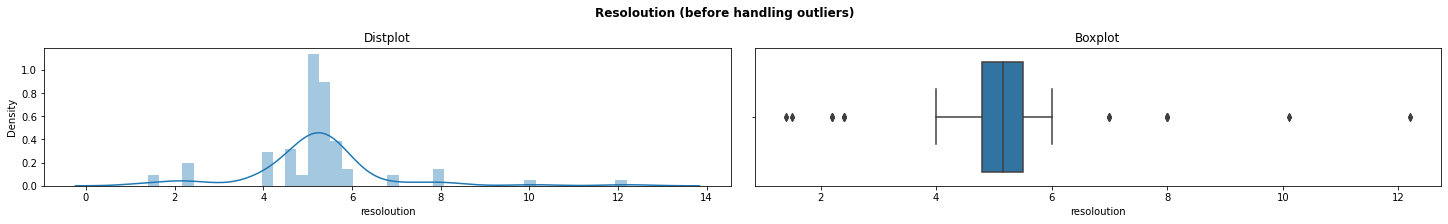

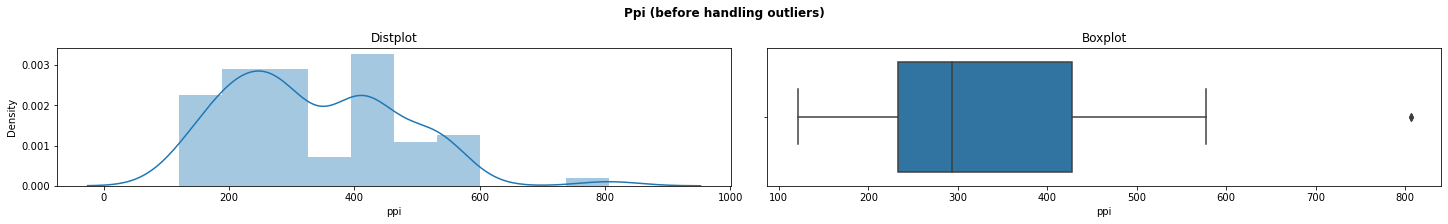

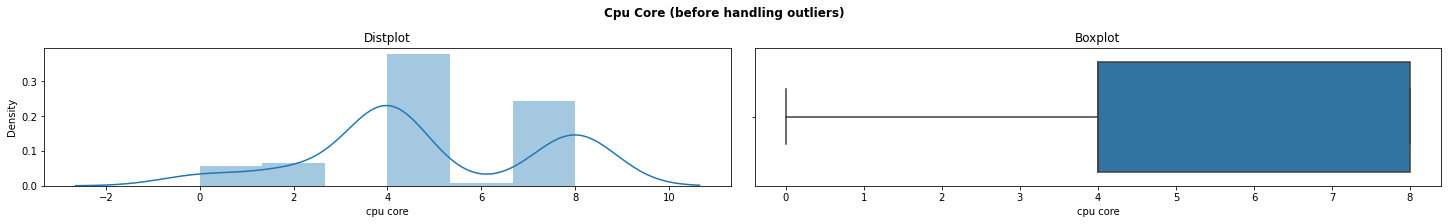

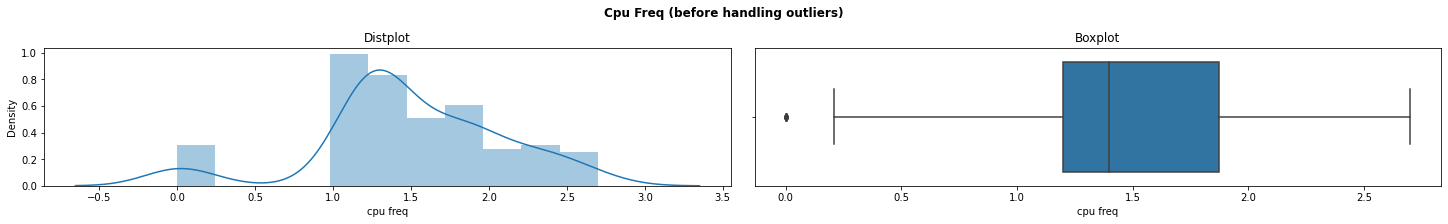

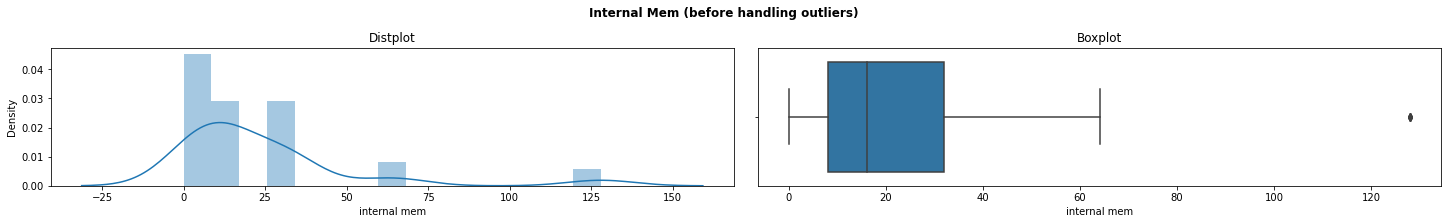

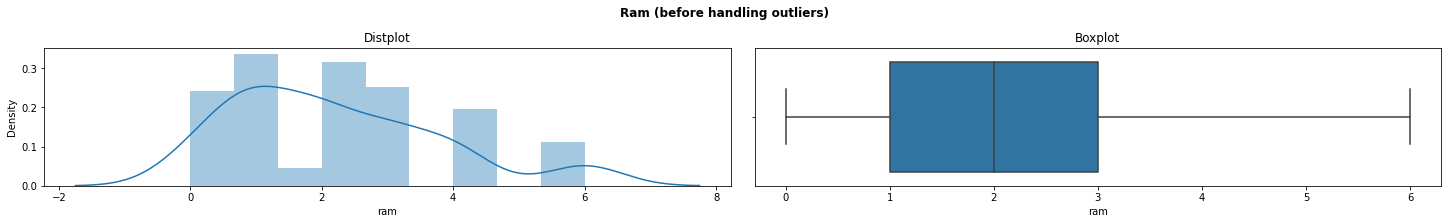

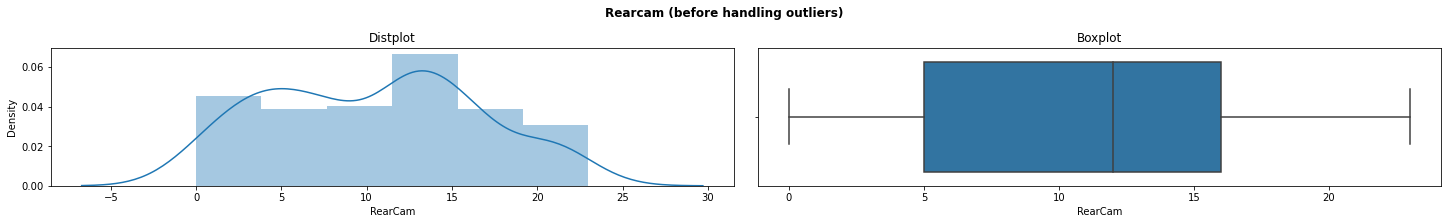

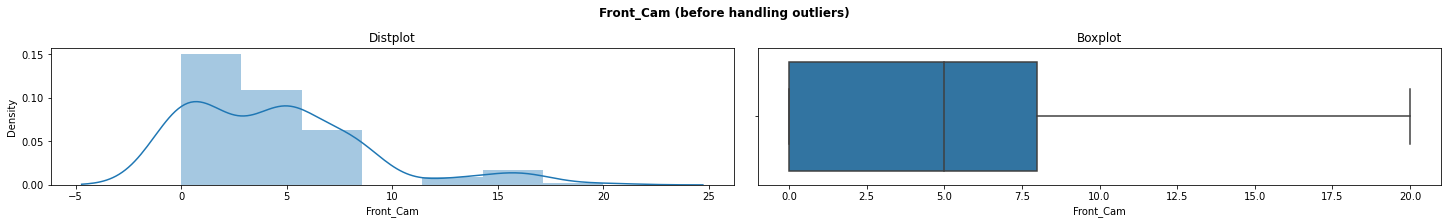

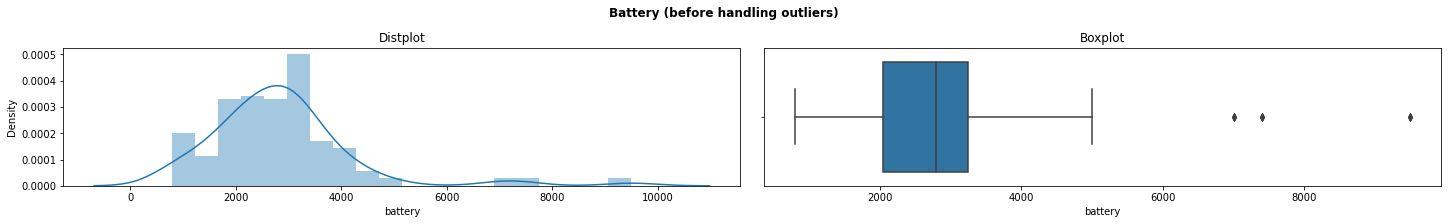

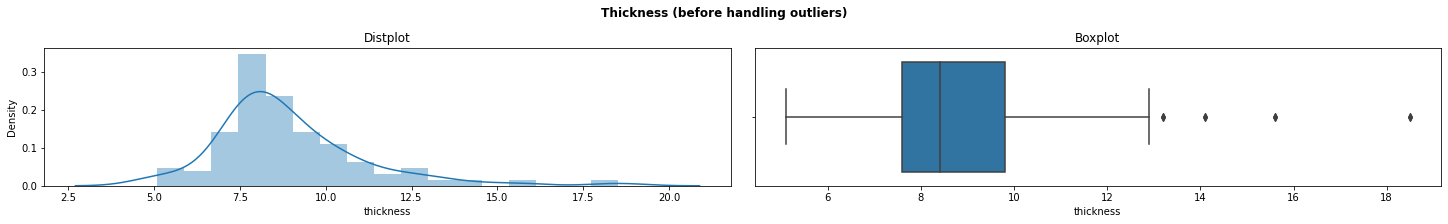

In [16]:
columns = data[:]

for col in columns:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')
    fig.show()

In [17]:
def outlier_prcnt(data, col_list):
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((data[col_name] > fence_high) | (data[col_name] < fence_low)).sum()
        total = data[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(data, columns)

Total outliers in Price are: 2 - 1.24%.
Total outliers in Sale are: 24 - 14.91%.
Total outliers in weight are: 24 - 14.91%.
Total outliers in resoloution are: 26 - 16.15%.
Total outliers in ppi are: 2 - 1.24%.
Total outliers in cpu core are: 0 - 0.0%.
Total outliers in cpu freq are: 10 - 6.21%.
Total outliers in internal mem are: 8 - 4.97%.
Total outliers in ram are: 0 - 0.0%.
Total outliers in RearCam are: 0 - 0.0%.
Total outliers in Front_Cam are: 0 - 0.0%.
Total outliers in battery are: 6 - 3.73%.
Total outliers in thickness are: 8 - 4.97%.


In [18]:
def outlier_handle(data, col_list):
    df_new = data.copy()
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
data = outlier_handle(data, columns)

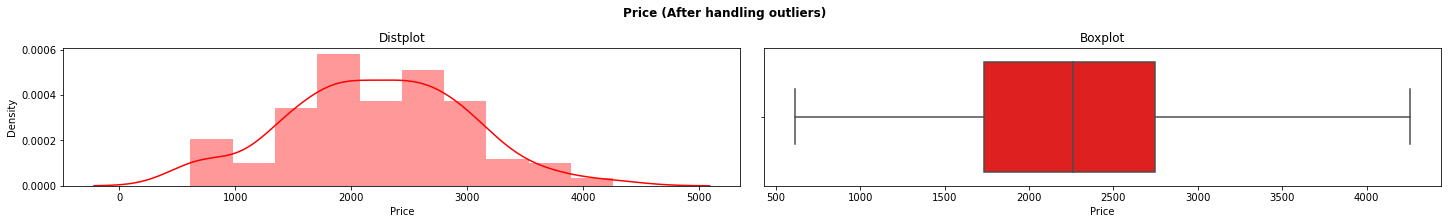

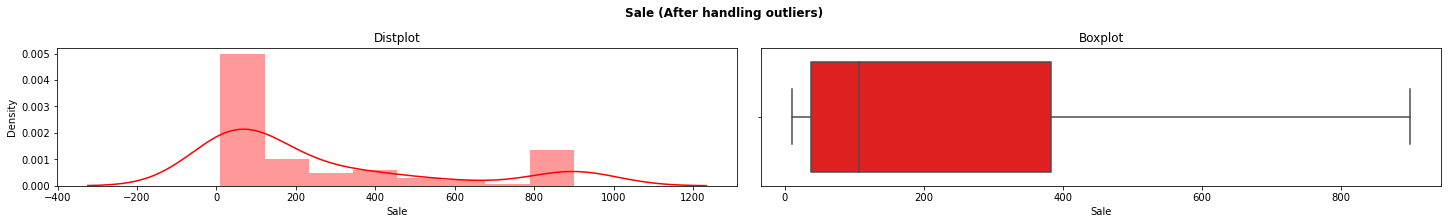

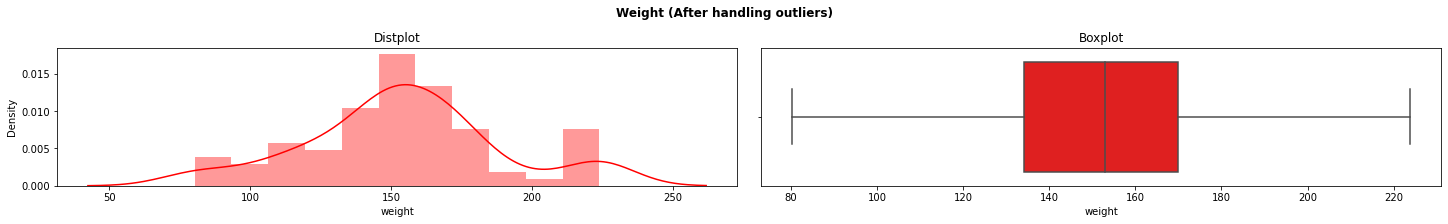

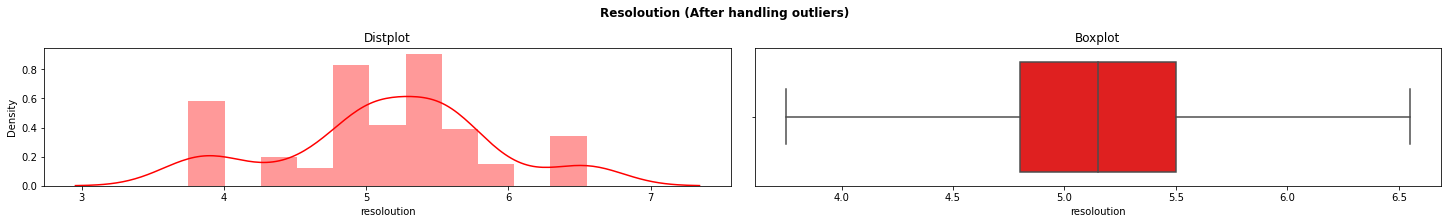

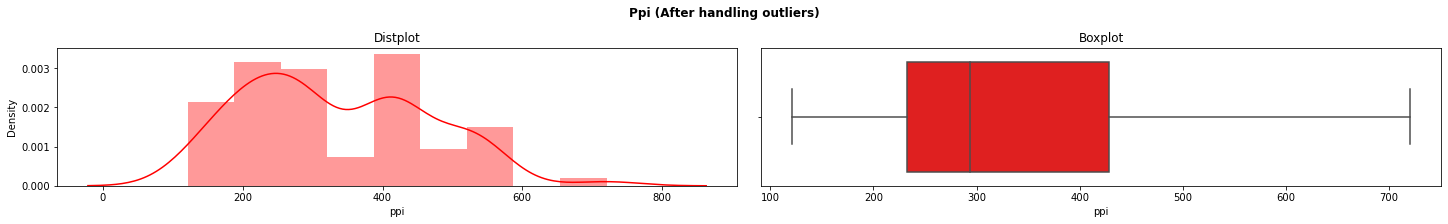

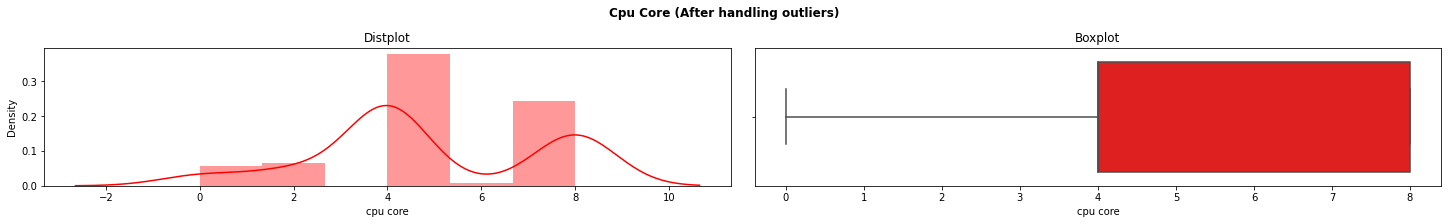

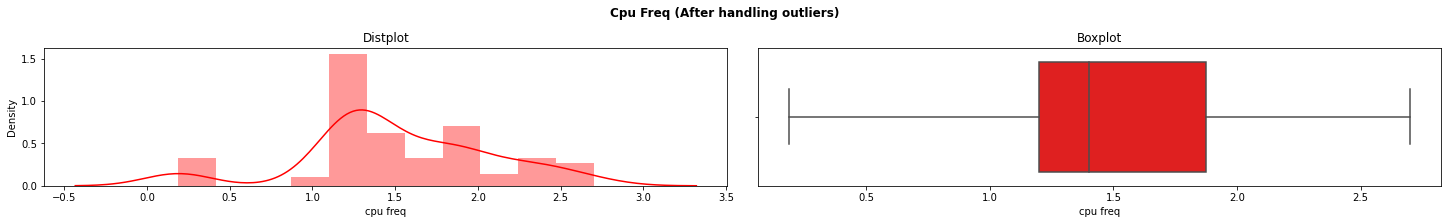

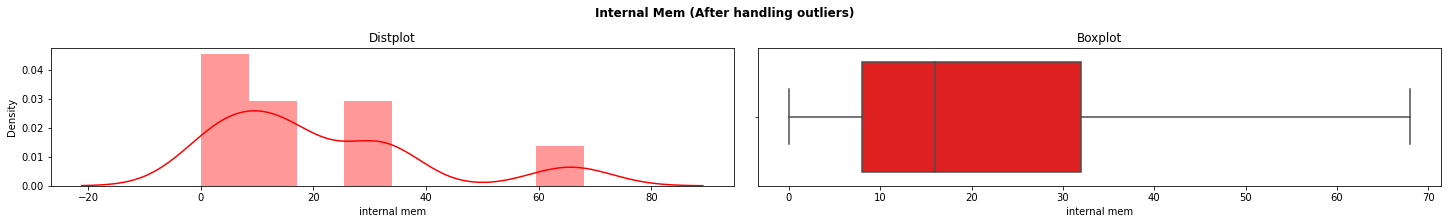

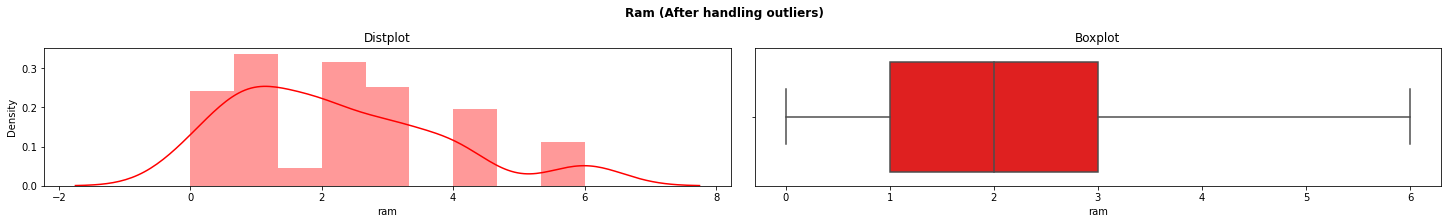

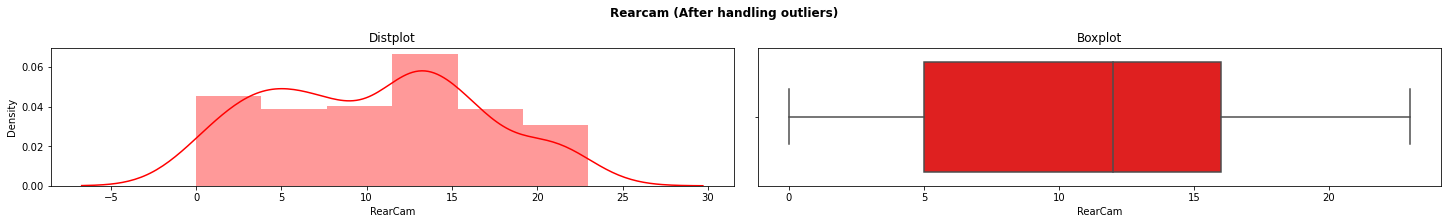

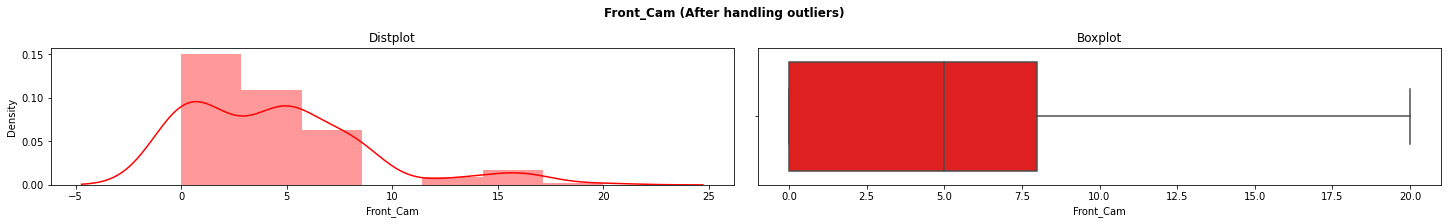

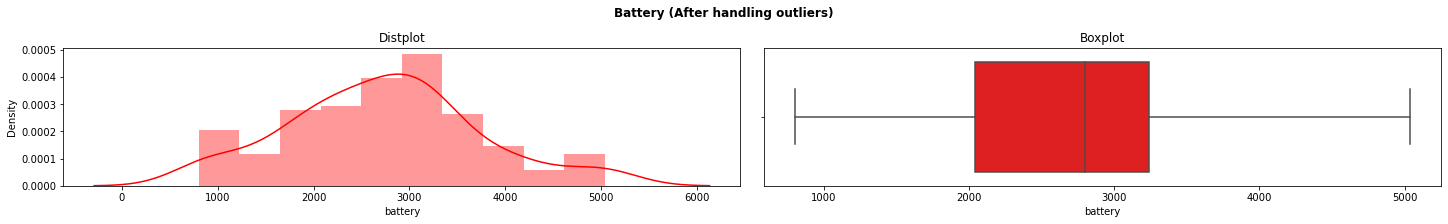

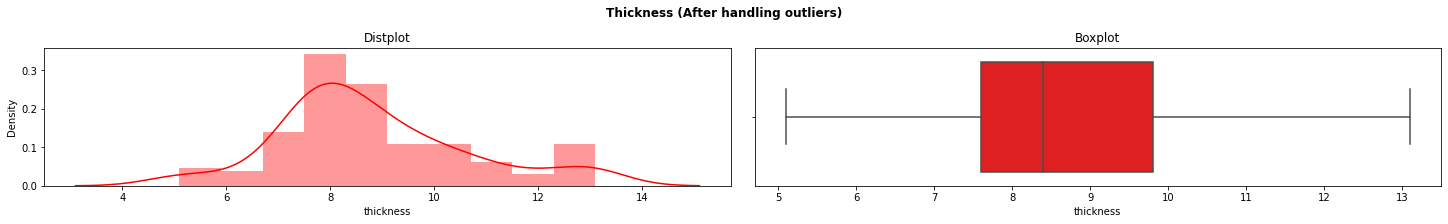

In [19]:
for col in columns:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

In [20]:
data.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2214.329193,259.571429,154.198758,5.159627,333.993789,4.857143,1.514478,21.520348,2.204994,10.378261,4.503106,2733.043478,8.809938
std,764.702023,307.268911,34.915756,0.731658,131.384276,2.444016,0.571470,19.487974,1.609831,6.181585,4.342053,1003.978208,1.843746
min,614.000000,10.000000,80.250000,3.750000,121.000000,0.000000,0.187500,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4259.000000,899.500000,223.850000,6.550000,720.500000,8.000000,2.700000,68.000000,6.000000,23.000000,20.000000,5040.000000,13.100000


<AxesSubplot:>

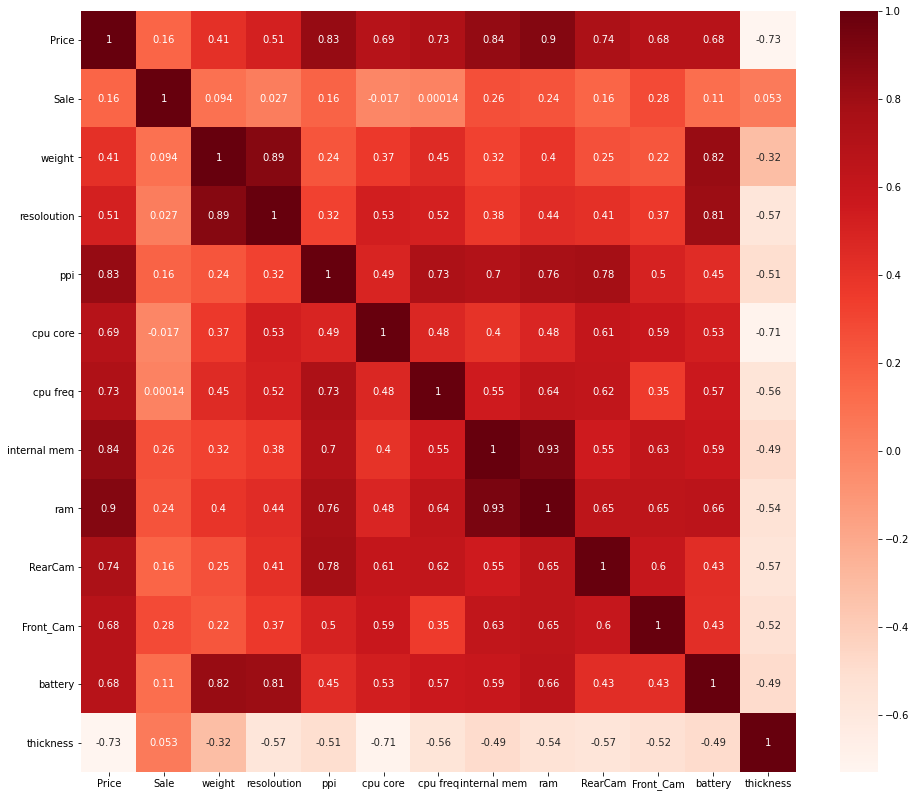

In [21]:
plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds')

Dropping unnecessary columns

Text(0.5, 1.0, 'Distribution of the column - Price')

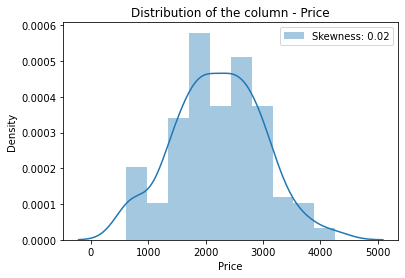

In [23]:
sns.distplot(data['Price'], label = 'Skewness: %.2f'%(data['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

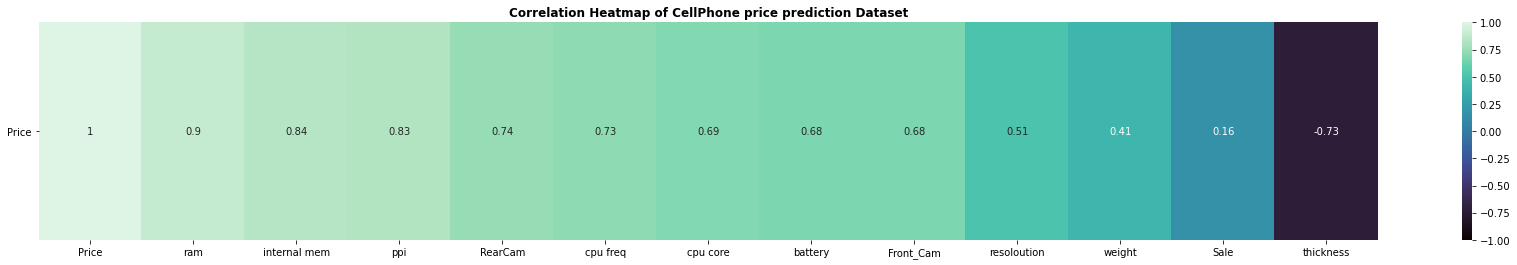

In [24]:
Target_corr  = data.corr().loc[:, 'Price'].to_frame().sort_values(by = 'Price' , ascending=False).T
plt.figure(figsize=(30,4))
plot = sns.heatmap(Target_corr, annot=True, cmap='mako', vmin = -1)
plt.title('Correlation Heatmap of CellPhone price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Linear Regression

In [25]:
X = data.drop('Price',axis=1).values
Y = data['Price'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
linear_regressor.score(x_train,y_train)

0.9500242033731588

In [34]:
linear_regressor.score(x_test,y_test)

0.939609934253573

In [35]:
y_pred = linear_regressor.predict(x_test)

In [36]:
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()

,y_test,y_pred
0,833.0,763.983455
1,1676.0,1890.743403
2,2508.0,2657.658720
3,1777.0,1440.672172
4,1511.0,1614.373686


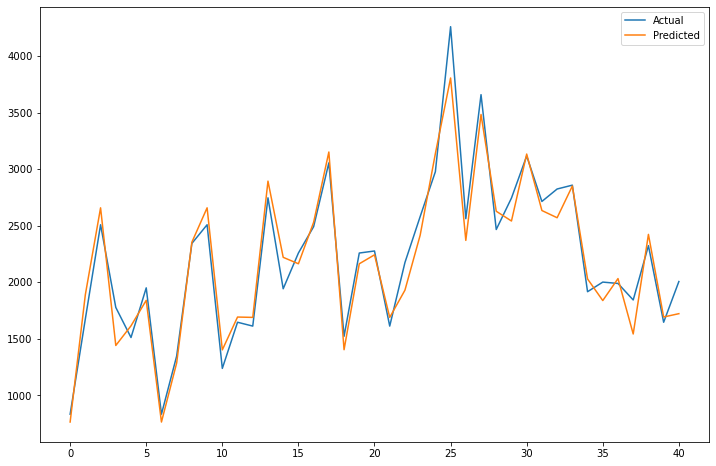

In [37]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [38]:
lr_mae = round(mean_absolute_error(y_test, y_pred), 3)
lr_mse = round(mean_squared_error(y_test, y_pred), 3)
lr_rmse = round(sqrt(lr_mse), 3)

lr_r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(lr_mae))
print('Mean Squared Error of the model is : {}'.format(lr_mse))
print('Root Mean Squared Error of the model is : {}'.format(lr_rmse))
print('R-squared value of the model is : {}'.format(lr_r2_value))

Mean Absolute Error  of the model is : 139.151
Mean Squared Error of the model is : 28615.663
Root Mean Squared Error of the model is : 169.162
R-squared value of the model is : 0.94


KNN

In [39]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [40]:
knn_model.n_neighbors

5

In [41]:
knn_model.effective_metric_

'euclidean'

In [43]:
knn_model.score(x_train,y_train)

0.9242487004556164

In [44]:
knn_model.score(x_test,y_test)

0.9096387527273463

In [45]:
y_pred = knn_model.predict(x_test)

In [46]:
KNN = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
KNN.head()

,y_test,y_pred
0,833.0,759.0
1,1676.0,1716.6
2,2508.0,2545.8
3,1777.0,1551.0
4,1511.0,1642.4


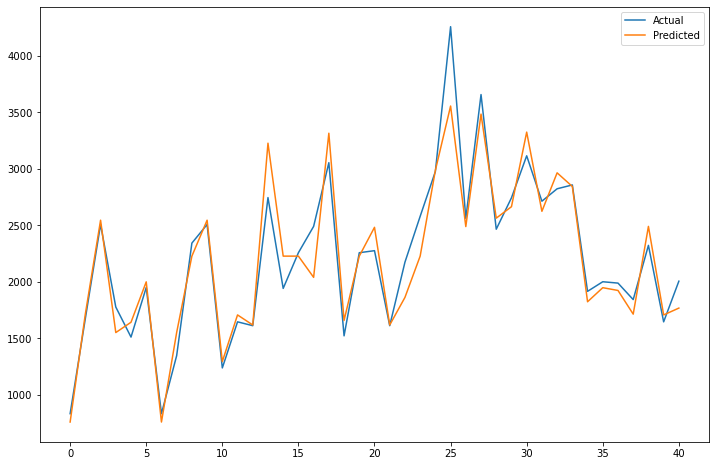

In [47]:
plt.figure(figsize=(12,8))
plt.plot(KNN[:50])
plt.legend(['Actual' , 'Predicted'])

In [48]:
knn_mae = round(mean_absolute_error(y_test, y_pred), 3)
knn_mse = round(mean_squared_error(y_test, y_pred), 3)
knn_rmse = round(sqrt(knn_mse), 3)

knn_r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(knn_mae))
print('Mean Squared Error of the model is : {}'.format(knn_mse))
print('Root Mean Squared Error of the model is : {}'.format(knn_rmse))
print('R-squared value of the model is : {}'.format(knn_r2_value))

Mean Absolute Error  of the model is : 147.893
Mean Squared Error of the model is : 42817.422
Root Mean Squared Error of the model is : 206.924
R-squared value of the model is : 0.91


RandomForest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
rfr.score(x_train,y_train)

0.9931391539047968

In [52]:
rfr.score(x_test,y_test)

0.9733047160889731

In [53]:
y_pred = rfr.predict(x_test)

In [54]:
RFR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
RFR.head()

,y_test,y_pred
0,833.0,835.07
1,1676.0,1789.72
2,2508.0,2624.21
3,1777.0,1713.71
4,1511.0,1602.61


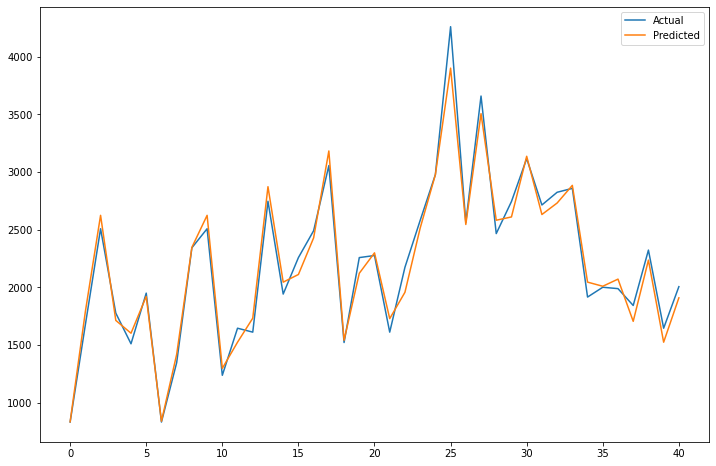

In [55]:
plt.figure(figsize=(12,8))
plt.plot(RFR[:50])
plt.legend(['Actual' , 'Predicted'])

In [56]:
rfr_mae = round(mean_absolute_error(y_test, y_pred), 3)
rfr_mse = round(mean_squared_error(y_test, y_pred), 3)
rfr_rmse = round(sqrt(rfr_mse), 3)

rfr_r2_value = round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error  of the model is : {}'.format(rfr_mae))
print('Mean Squared Error of the model is : {}'.format(rfr_mse))
print('Root Mean Squared Error of the model is : {}'.format(rfr_rmse))
print('R-squared value of the model is : {}'.format(rfr_r2_value))

Mean Absolute Error  of the model is : 90.833
Mean Squared Error of the model is : 12649.485
Root Mean Squared Error of the model is : 112.47
R-squared value of the model is : 0.973
